In [18]:
import pandas as pd

# Czytanie pliku CSV
data = pd.read_csv("E:/Projekty_Programy/NLP/Dane/Fifa_world_cup_matches.csv")

# Wyświetlanie pierwszych 5 wierszy
print(data.head())


           team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS              44%              45%   
3  UNITED STATES         WALES              51%              39%   
4      ARGENTINA  SAUDI ARABIA              64%              24%   

  possession in contest  number of goals team1  number of goals team2  \
0                    8%                      0                      2   
1                    9%                      6                      2   
2                   11%                      0                      2   
3                   10%                      1                      1   
4                   12%                      1                      2   

          date     hour category  ...  penalties scored team1  \
0  20 NOV 2022  17 : 00  Group A  ...                       0   
1  21 NOV 2022  14 : 0

In [19]:
# Sprawdzanie pustych miejsc
print(data.isnull().sum())


team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64


In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [21]:
data.columns 

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [38]:
# Convert percentage strings to float
data['possession team1'] = data['possession team1'].str.rstrip('%').astype('float') / 100.0
data['possession team2'] = data['possession team2'].str.rstrip('%').astype('float') / 100.0

average_possession_team1 = data.groupby('team1')['possession team1'].mean()
average_possession_team2 = data.groupby('team2')['possession team2'].mean()

average_possession = pd.concat([average_possession_team1, average_possession_team2]).groupby(level=0).mean()

# Zaokrąglenie do 2 miejsc po przecinku
average_possession = average_possession.round(2)

print(average_possession)


ARGENTINA         0.52
AUSTRALIA         0.29
BELGIUM           0.49
BRAZIL            0.50
CAMEROON          0.40
CANADA            0.48
COSTA RICA        0.28
CROATIA           0.49
DENMARK           0.54
ECUADOR           0.48
ENGLAND           0.58
FRANCE            0.45
GERMANY           0.56
GHANA             0.40
IRAN              0.34
JAPAN             0.27
KOREA REPUBLIC    0.42
MEXICO            0.50
MOROCCO           0.34
NETHERLANDS       0.45
POLAND            0.32
PORTUGAL          0.55
QATAR             0.40
SAUDI ARABIA      0.35
SENEGAL           0.41
SERBIA            0.43
SPAIN             0.69
SWITZERLAND       0.43
TUNISIA           0.36
UNITED STATES     0.49
URUGUAY           0.43
WALES             0.40
dtype: float64


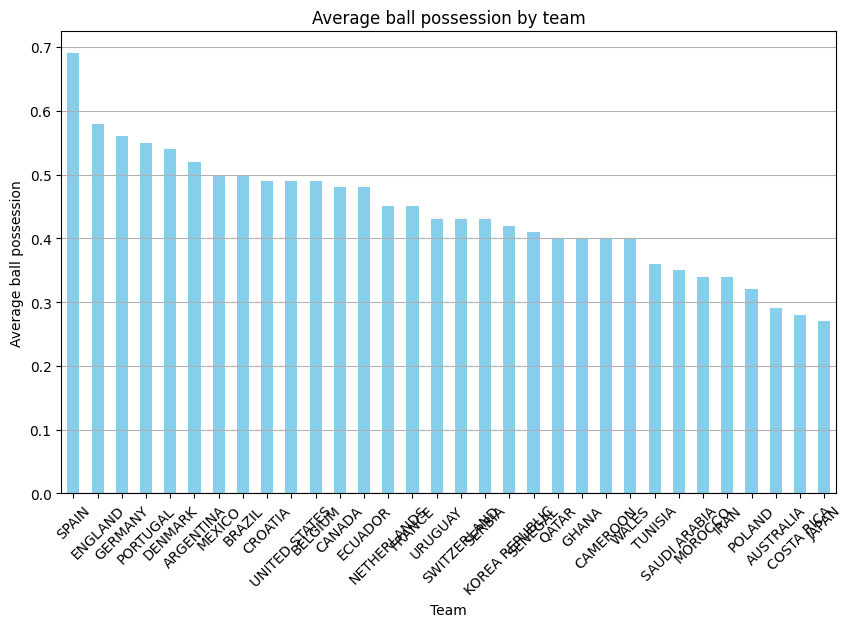

In [39]:
import matplotlib.pyplot as plt

# Sortowanie wyników w porządku malejącym
average_possession = average_possession.sort_values(ascending=False)

# Utworzenie wykresu
plt.figure(figsize=(10,6))
average_possession.plot(kind='bar', color='skyblue')

plt.title('Average ball possession by team')
plt.xlabel('Team')
plt.ylabel('Average ball possession')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


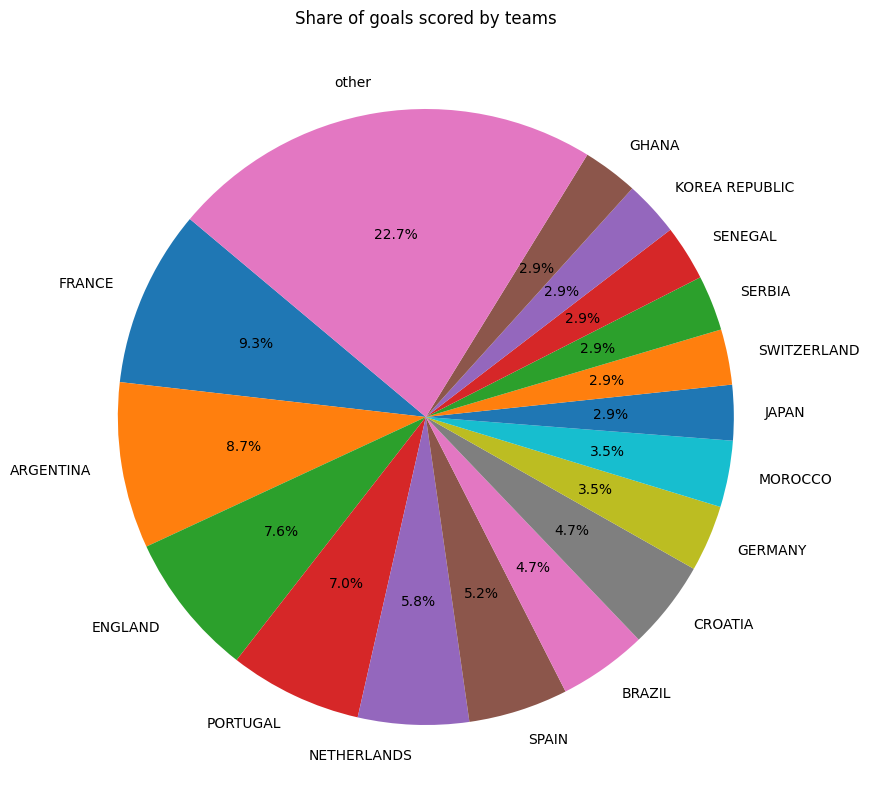

In [23]:
import matplotlib.pyplot as plt

# Obliczanie sumy goli strzelonych przez każdą drużynę
total_goals_team1 = data.groupby('team1')['number of goals team1'].sum()
total_goals_team2 = data.groupby('team2')['number of goals team2'].sum()

# Łączenie wyników
total_goals = pd.concat([total_goals_team1, total_goals_team2]).groupby(level=0).sum()

# Sortowanie wyników w porządku malejącym
total_goals = total_goals.sort_values(ascending=False)

# Wybieranie 10 drużyn z największą liczbą goli
top_15_teams = total_goals[:16]
remaining_teams = total_goals[16:]

# Dodawanie pozostałych drużyn do kategorii "Pozostałe"
top_15_teams.loc['other'] = remaining_teams.sum()

# Tworzenie wykresu kołowego
plt.figure(figsize=(10,10))
plt.pie(top_15_teams, labels=top_15_teams.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of goals scored by teams')


plt.show()


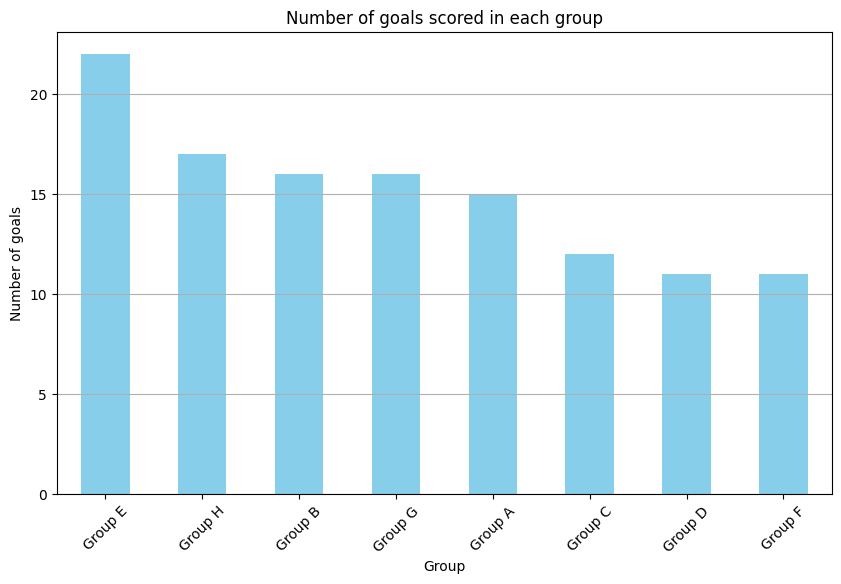

In [24]:
# Wybieranie meczów z grup od "Group A" do "Group H"
group_matches = data[data['category'].str.startswith(('Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'))]

# Obliczanie sumy goli strzelonych w każdej grupie
group_goals_team1 = group_matches.groupby('category')['number of goals team1'].sum()
group_goals_team2 = group_matches.groupby('category')['number of goals team2'].sum()

# Łączenie wyników
group_goals = group_goals_team1 + group_goals_team2

# Sortowanie wyników w porządku malejącym
group_goals = group_goals.sort_values(ascending=False)

# Tworzenie wykresu
plt.figure(figsize=(10,6))
group_goals.plot(kind='bar', color='skyblue')

plt.title('Number of goals scored in each group')
plt.xlabel('Group')
plt.ylabel('Number of goals')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


In [25]:
# Wybieranie meczów z grup od "Group A" do "Group H"
group_matches = data[data['category'].str.startswith(('Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'))]

# Wypisywanie reprezentacji w każdej grupie
for group in group_matches['category'].unique():
    teams_in_group = group_matches[group_matches['category'] == group]['team1'].unique().tolist() + group_matches[group_matches['category'] == group]['team2'].unique().tolist()
    teams_in_group = list(set(teams_in_group))  # Usuwanie duplikatów
    print(f"{group}: {', '.join(teams_in_group)}")


Group A: NETHERLANDS, SENEGAL, QATAR, ECUADOR
Group B: UNITED STATES, WALES, ENGLAND, IRAN
Group C: POLAND, SAUDI ARABIA, ARGENTINA, MEXICO
Group D: TUNISIA, AUSTRALIA, FRANCE, DENMARK
Group F: BELGIUM, MOROCCO, CROATIA, CANADA
Group E: SPAIN, GERMANY, JAPAN, COSTA RICA
Group G: BRAZIL, CAMEROON, SERBIA, SWITZERLAND
Group H: KOREA REPUBLIC, GHANA, URUGUAY, PORTUGAL


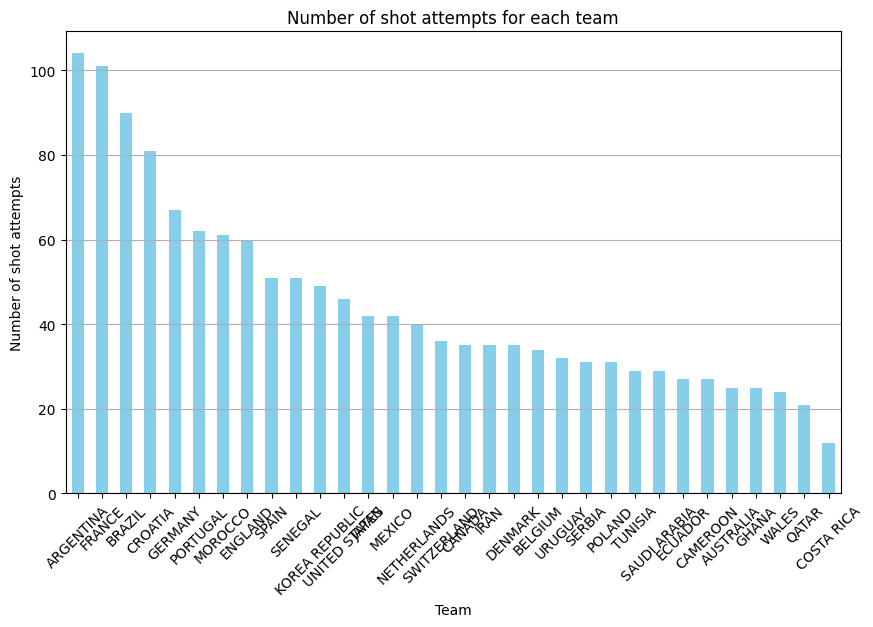

In [26]:


# Obliczanie sumy prób strzałów dla każdej drużyny
total_attempts_team1 = data.groupby('team1')['total attempts team1'].sum()
total_attempts_team2 = data.groupby('team2')['total attempts team2'].sum()

# Łączenie wyników
total_attempts = pd.concat([total_attempts_team1, total_attempts_team2]).groupby(level=0).sum()

# Sortowanie wyników w porządku malejącym
total_attempts = total_attempts.sort_values(ascending=False)

# Tworzenie wykresu
plt.figure(figsize=(10,6))
total_attempts.plot(kind='bar', color='skyblue')

plt.title('Number of shot attempts for each team')
plt.xlabel('Team')
plt.ylabel('Number of shot attempts')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


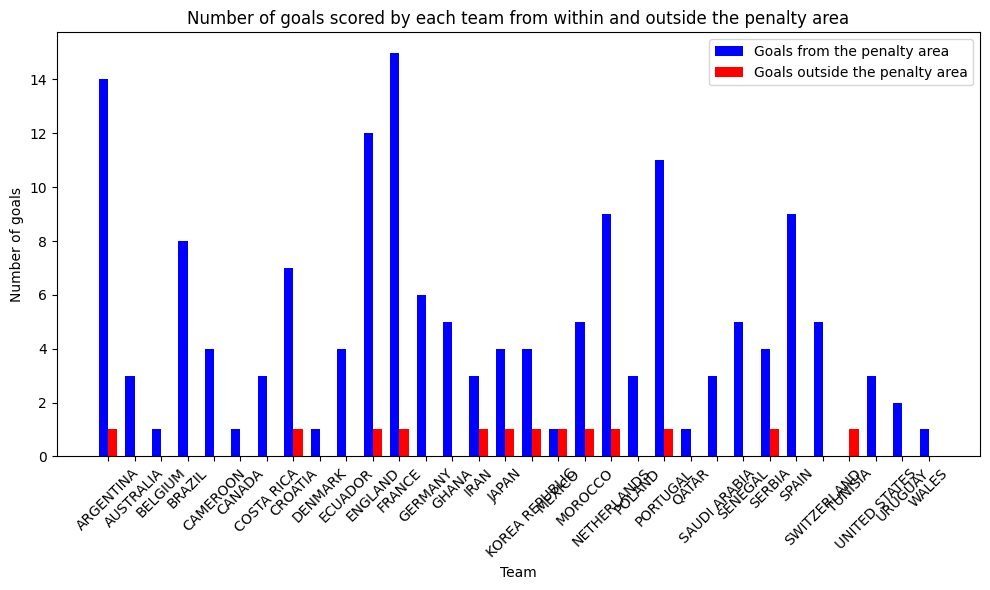

In [27]:
import numpy as np

# Obliczanie sumy goli strzelonych przez każdą drużynę z pola karnego i poza nim
inside_goals_team1 = data.groupby('team1')['goal inside the penalty area team1'].sum()
inside_goals_team2 = data.groupby('team2')['goal inside the penalty area team2'].sum()
outside_goals_team1 = data.groupby('team1')['goal outside the penalty area team1'].sum()
outside_goals_team2 = data.groupby('team2')['goal outside the penalty area team2'].sum()

# Łączenie wyników
inside_goals = pd.concat([inside_goals_team1, inside_goals_team2]).groupby(level=0).sum()
outside_goals = pd.concat([outside_goals_team1, outside_goals_team2]).groupby(level=0).sum()

# Tworzenie wykresu
bar_width = 0.35
index = np.arange(len(inside_goals))

plt.figure(figsize=(10,6))
bar1 = plt.bar(index, inside_goals, bar_width, color='b', label='Goals from the penalty area')
bar2 = plt.bar(index + bar_width, outside_goals, bar_width, color='r', label='Goals outside the penalty area')

plt.xlabel('Team')
plt.ylabel('Number of goals')
plt.title('Number of goals scored by each team from within and outside the penalty area')

plt.xticks(index + bar_width / 2, inside_goals.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


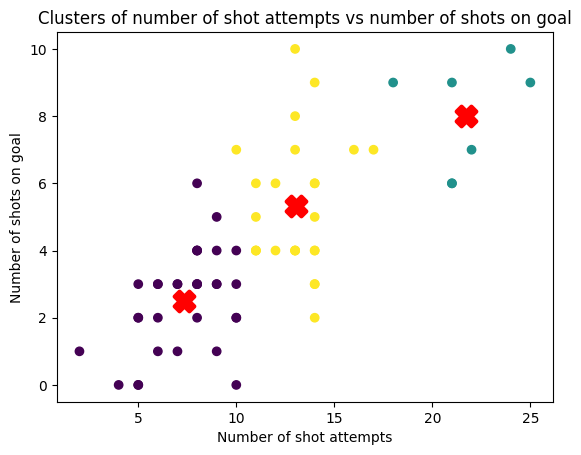

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wybierz dwie kolumny do wizualizacji
x = data[['total attempts team1', 'on target attempts team1']].values

# Utwórz instancję KMeans
kmeans = KMeans(n_clusters=3)

# Dopasuj model do danych
kmeans.fit(x)

# Pobierz etykiety klastrów
labels = kmeans.predict(x)

# Pobierz współrzędne centroidów
centroids = kmeans.cluster_centers_

# Wizualizacja wyników
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('Number of shot attempts')
plt.ylabel('Number of shots on goal')
plt.title('Clusters of number of shot attempts vs number of shots on goal')

plt.show()


e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


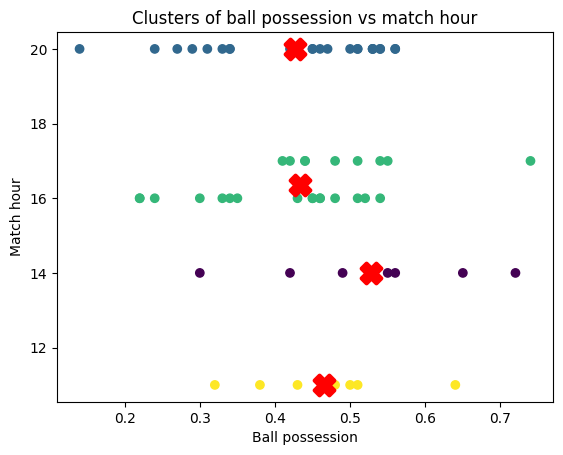

In [40]:


# Przekształcanie godziny meczu na format numeryczny
data['hour_num'] = data['hour'].str.split(' : ').apply(lambda x: int(x[0]) + int(x[1])/60)

# Wybierz dwie kolumny do wizualizacji
x = data[['possession team1', 'hour_num']].values

# Utwórz instancję KMeans
kmeans = KMeans(n_clusters=4)

# Dopasuj model do danych
kmeans.fit(x)

# Pobierz etykiety klastrów
labels = kmeans.predict(x)

# Pobierz współrzędne centroidów
centroids = kmeans.cluster_centers_

# Wizualizacja wyników
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('Ball possession')
plt.ylabel('Match hour')
plt.title('Clusters of ball possession vs match hour')
plt.show()


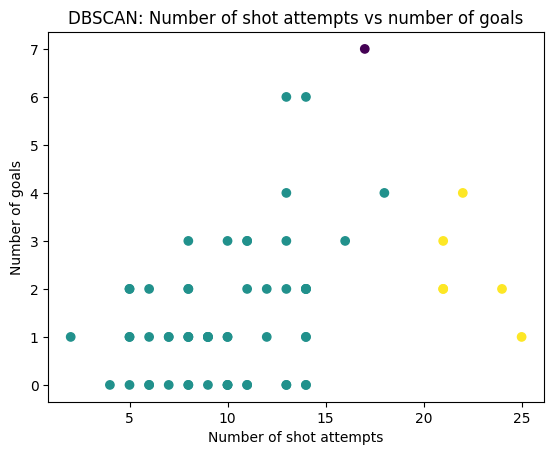

In [32]:
from sklearn.cluster import DBSCAN

# Wybierz dwie kolumny do wizualizacji
x = data[['total attempts team1', 'number of goals team1']].values

# Utwórz instancję DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)

# Dopasuj model do danych
dbscan.fit(x)

# Pobierz etykiety klastrów
labels = dbscan.labels_

# Wizualizacja wyników
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.xlabel('Number of shot attempts')
plt.ylabel('Number of goals')
plt.title('DBSCAN: Number of shot attempts vs number of goals')

plt.show()


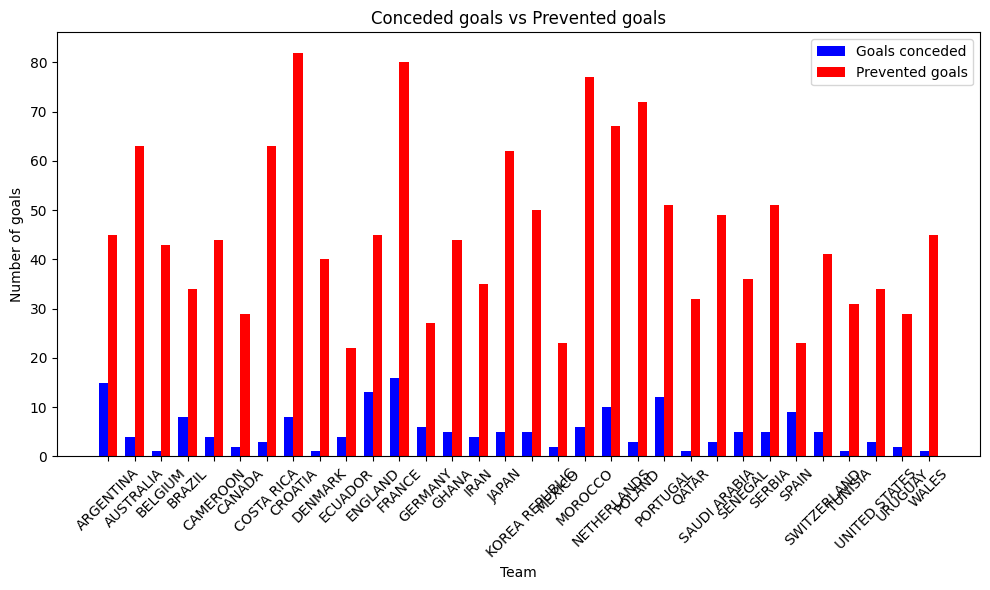

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Obliczanie sumy straconych goli i zapobieganych goli dla każdej drużyny
goals_conceded_team1 = data.groupby('team1')['number of goals team1'].sum()  # 'number of goals team2' to liczba goli straconych przez drużynę 1
goals_conceded_team2 = data.groupby('team2')['number of goals team2'].sum()

goal_preventions_team1 = data.groupby('team1')['goal preventions team1'].sum()
goal_preventions_team2 = data.groupby('team2')['goal preventions team2'].sum()

# Łączenie wyników
goals_conceded = pd.concat([goals_conceded_team1, goals_conceded_team2]).groupby(level=0).sum()
goal_preventions = pd.concat([goal_preventions_team1, goal_preventions_team2]).groupby(level=0).sum()


# Tworzenie wykresu
bar_width = 0.35
index = np.arange(len(goals_conceded))

plt.figure(figsize=(10,6))
bar1 = plt.bar(index, goals_conceded, bar_width, color='b', label='Goals conceded')
bar2 = plt.bar(index + bar_width, goal_preventions, bar_width, color='r', label='Prevented goals')

plt.xlabel('Team')
plt.ylabel('Number of goals')
plt.title('Conceded goals vs Prevented goals')

plt.xticks(index + bar_width / 2, goals_conceded.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


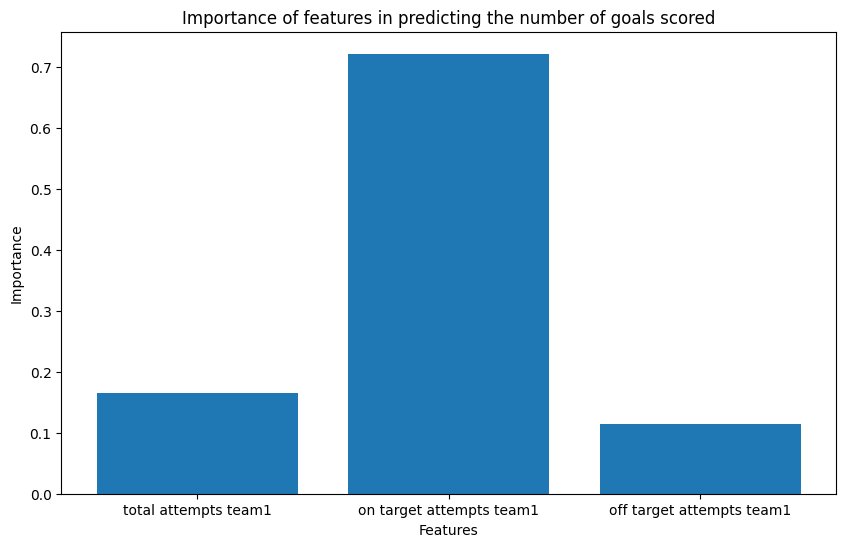

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Wybierz kolumny do analizy
features = ['total attempts team1', 'on target attempts team1', 'off target attempts team1']
target = 'number of goals team1'

# Podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Utwórz instancję RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Dopasuj model do danych treningowych
rf.fit(X_train, y_train)

# Oblicz ważność cech
importances = rf.feature_importances_

# Wizualizacja ważności cech
plt.figure(figsize=(10,6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of features in predicting the number of goals scored')

plt.show()


e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

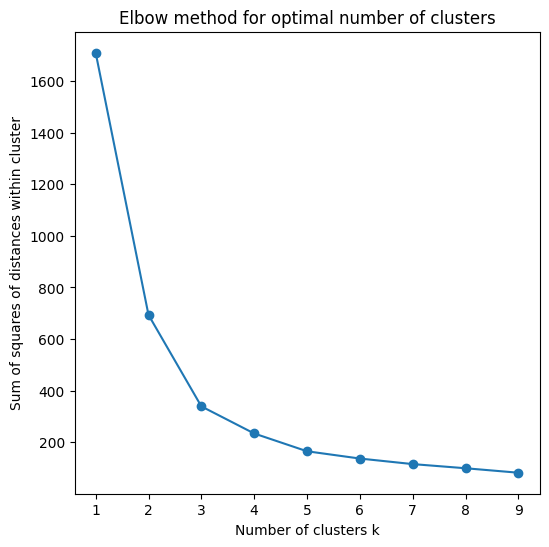

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wybierz kolumnę do analizy
X = data[['total attempts team1', 'number of goals team1']].values

# Oblicz sumę kwadratów odległości wewnątrz klastra dla różnych wartości k
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Wykres SSE w funkcji k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squares of distances within cluster')
plt.title('Elbow method for optimal number of clusters')

plt.show()


e:\ProgramyPliki\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


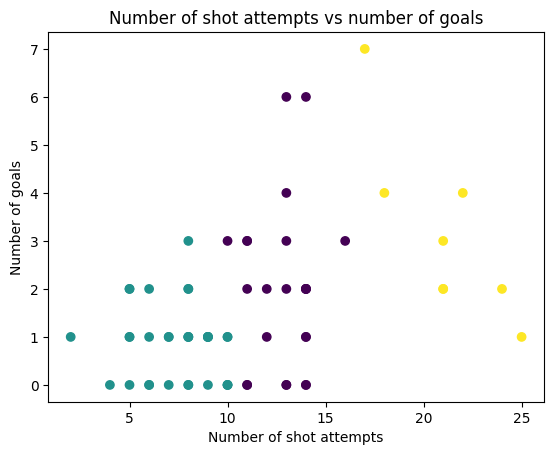

In [36]:

# Wybierz kolumny do analizy
X = data[['total attempts team1', 'number of goals team1']].values

# Utwórz instancję KMeans
kmeans = KMeans(n_clusters=3)

# Dopasuj model do danych
kmeans.fit(X)

# Pobierz etykiety klastrów
labels = kmeans.labels_

# Wizualizacja wyników
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Number of shot attempts')
plt.ylabel('Number of goals')
plt.title('Number of shot attempts vs number of goals')

plt.show()
